# Different Evaluation Metrics for KNN

The notebook demonstrates when and how to use different evaluation metrics with KNN classifier. Some of these metrics are:
* precision score
* recall score
* f1 score

In [1]:
# Import libraries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load data
df = pd.read_csv('../datasets/mldata2.csv')
df.head()

,age,height,weight,gender,likeness
0,27,170.688,76.0,Male,Biryani
1,41,165.000,70.0,Male,Biryani
2,29,171.000,80.0,Male,Biryani
3,27,173.000,102.0,Male,Biryani
4,29,164.000,67.0,Male,Biryani


In [3]:
# Convert data type
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

In [4]:
# Split data
X = df[['age', 'height', 'weight', 'gender']]
y = df['likeness']

In [5]:
X.head()

,age,height,weight,gender
0,27,170.688,76.0,1
1,41,165.000,70.0,1
2,29,171.000,80.0,1
3,27,173.000,102.0,1
4,29,164.000,67.0,1


In [6]:
y.head()

0    Biryani
1    Biryani
2    Biryani
3    Biryani
4    Biryani
Name: likeness, dtype: object

In [7]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# Train and test data shape
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((196, 4), (196,), (49, 4), (49,))

In [27]:
# Create model
model = KNeighborsClassifier(n_neighbors=13)
# Fit model
model.fit(X_train, y_train)

# Make prediction
y_pred = model.predict(X_test)

# Evaluate model
score = accuracy_score(y_test, y_pred)
print(f'The accuracy score for our model is = {score}')

The accuracy score for our model is = 0.6530612244897959


In [42]:
# Try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# Create an empty list
scores = []

# Loop through the range 1 to 26 and
# append the scores in the list
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred2 = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred2))

print(scores)

[0.4489795918367347, 0.5102040816326531, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5918367346938775, 0.5918367346938775, 0.6122448979591837, 0.6122448979591837, 0.6122448979591837, 0.6530612244897959, 0.6530612244897959, 0.6530612244897959, 0.6530612244897959, 0.6530612244897959, 0.6530612244897959, 0.6530612244897959, 0.6530612244897959, 0.6530612244897959, 0.6530612244897959, 0.6530612244897959, 0.6530612244897959, 0.6530612244897959, 0.6530612244897959]


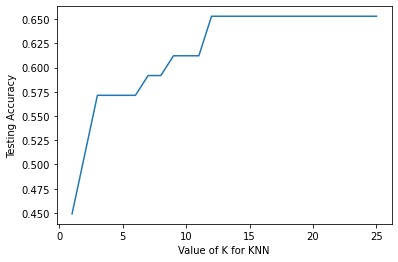

In [43]:
# Plot the relationship between K and testing accuracy
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy');

Accuracy does not improve after 65%.

Find out models `precision, recall, and f1-score`.

In [44]:
# Calculate precision, recall and f1-score
from sklearn.metrics import precision_score, recall_score, f1_score

precison = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print(f'Models precision score: {precison}')
print(f'Models recall score: {recall}')
print(f'Models f1-score: {f1}')

Models precision score: 0.6530612244897959
Models recall score: 0.6530612244897959
Models f1-score: 0.6530612244897959


We have just seen **how** to use evaluation metrics for classification problem. Now let's see **when** to them.

**Precision** is a good measure to determine, when the costs of False Positive is high. For instance, if we trained a classifier to detect videos that are safe for kids, we would probably prefer a classifier that rejects many good videos (low recall) but keeps only safe ones (high precision).

On the other hand, **Recall** actually calculates how many of the actual positives our model capture through labeling it as Positive (True Positive). For example, suppose we train a classifier to detect shoplifters in surveillance images: it is probably fine if our classifier has only 30% precision as long as it has 90% recall (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught).

**F1-score** is need when we want to seek a balance between **Precision** and **Recall**. The F1 score is the *harmonic mean* of precision and recall. Whereas the regular means treats all values equally, the harmonic mean gives much more weight to low values. As a result, the classifier will only get a high f1 score if both recall and precision are high.